# Import dependencies

In [1]:
import cv2
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Layer,Conv2D,Dense,MaxPooling2D,Input,Flatten,BatchNormalization,Dropout,GlobalMaxPooling2D,Activation
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from tensorflow import keras

# GPU growth

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Folders required

In [4]:
TRAIN_PATH = os.path.join('Dataset','Dataset','train')
TEST_PATH = os.path.join('test','test')
VALIDATION_PATH = os.path.join('Dataset','Dataset','valid')

In [5]:
class_names = os.listdir(TRAIN_PATH)
print("The no. of classes present in the dataset are: ",len(class_names))
print()
print("The classes present in the dataset are:",class_names)


The no. of classes present in the dataset are:  38

The classes present in the dataset are: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato__

## Print randomly 24 images from the dataset

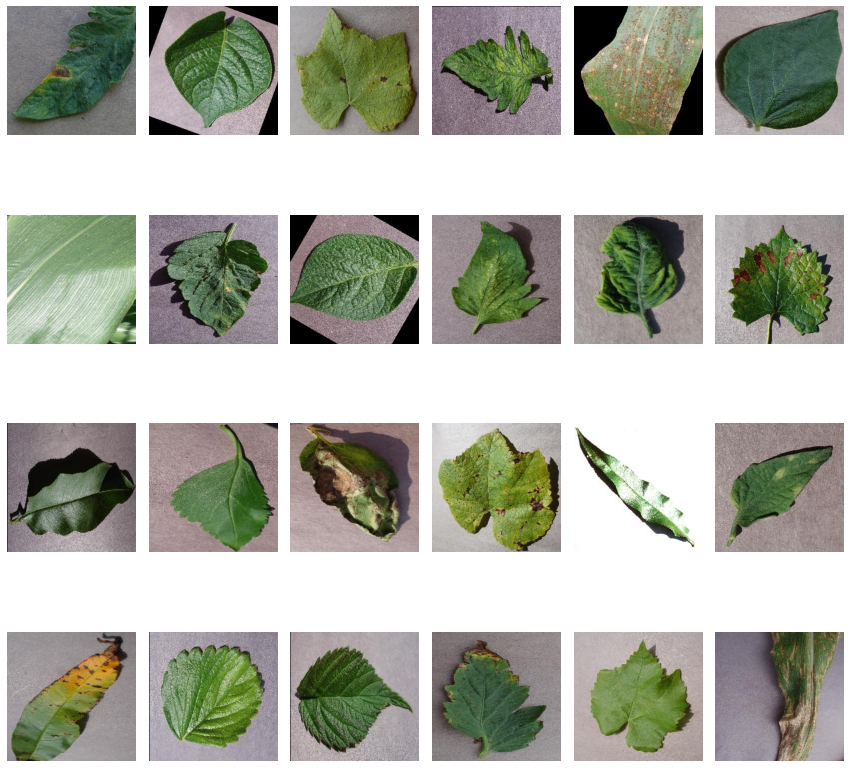

In [6]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(TRAIN_PATH)))
    random_folder_path=os.path.join(TRAIN_PATH,os.listdir(TRAIN_PATH)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [7]:
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(TRAIN_PATH+"/"+class_name))
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class

,Number of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


In [14]:
data=[]
imagepaths=[]
labels=[]
for r,d,f in os.walk(r'./dataset/dataset/train'):
    for file in f:
       #if '.jpg' in file:
        k = r.split('\\')[1]
        if labels.count(k)<501:
            labels.append(k)
            imagepaths.append(os.path.join(r,file))
        

In [15]:
print(len(imagepaths))
print(len(labels))

19038
19038


In [16]:
for path in imagepaths:
    img=Image.open(path)
    img = img.resize((180,180))
    img = np.array(img)
    if(img.shape == (180,180,3)):
        data.append(np.array(img))

KeyboardInterrupt: 

In [ ]:
len(data)

19038

In [ ]:
data1=np.array(data)

In [ ]:
data1.shape

(19038, 180, 180, 3)

In [ ]:
labels1=np.array(labels)

In [ ]:
#label encoding the given labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
labels2= label_encoder.fit_transform(labels1)

In [ ]:
np.unique(labels2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data1, labels2, test_size=0.2, shuffle=True, random_state=101)

In [ ]:
print(len(x_train))
print(len(x_test))

15230
3808


In [ ]:
# x_train=x_train[:10000]
# y_train=y_train[:10000]
# x_test=x_test[:2000]
# y_test=y_test[:2000]

In [ ]:
# print(len(x_train))
# print(len(x_test))

In [ ]:
model=Sequential()
#cnn1
# model.add(Conv2D(512,kernel_size=(10,10),input_shape=(224, 224, 3),strides=2,padding="same"))
# model.add(Conv2D(512,kernel_size=(10,10),strides=2,padding="same",activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(5,5),strides=1,padding="same"))
# model.add(Dropout(0.25))
#cnn2
model.add(Conv2D(256,kernel_size=(5,5),input_shape=(180,180,3),strides=2,padding="same"))
model.add(Conv2D(256,kernel_size=(5,5),strides=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=1,padding="same"))
model.add(Dropout(0.25))
#cnn3
model.add(Conv2D(128,kernel_size=(2,2),strides=1,padding="same",activation="relu"))
model.add(Conv2D(128,kernel_size=(2,2),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding="same"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=38,activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 256)       19456     
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 256)       1638656   
                                                                 
 batch_normalization (BatchN  (None, 45, 45, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 45, 45, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       1

In [ ]:
history = model.fit(x_train, y_train,epochs = 20, batch_size = 20, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/20
762/762 [==============================] - 147s 184ms/step - loss: 4.2536 - accuracy: 0.0489 - val_loss: 3.5400 - val_accuracy: 0.0512
Epoch 2/20
762/762 [==============================] - 148s 194ms/step - loss: 3.6121 - accuracy: 0.0477 - val_loss: 4.0934 - val_accuracy: 0.0381
Epoch 3/20
762/762 [==============================] - 149s 195ms/step - loss: 3.6450 - accuracy: 0.0262 - val_loss: 3.6417 - val_accuracy: 0.0213
Epoch 4/20
762/762 [==============================] - 149s 195ms/step - loss: 3.6397 - accuracy: 0.0254 - val_loss: 3.6399 - val_accuracy: 0.0213
Epoch 5/20
762/762 [==============================] - 151s 198ms/step - loss: 3.6387 - accuracy: 0.0268 - val_loss: 3.6394 - val_accuracy: 0.0226
Epoch 6/20
762/762 [==============================] - 149s 196ms/step - loss: 3.6383 - accuracy: 0.0250 - val_loss: 3.6393 - val_accuracy: 0.0213
Epoch 7/20
762/762 [==============================] - 150s 197ms/step - loss: 3.6381 - accuracy: 0.0261 - val_loss: 3.6391 -

# Prediction

2.7430400252342224% Confidence ['Tomato___Early_blight']


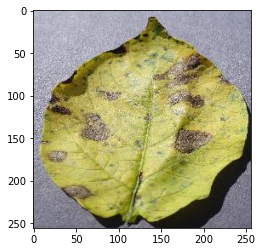

In [ ]:

from matplotlib.pyplot import imshow
img = Image.open(r'./test/test/PotatoEarlyBlight4.JPG')
x = np.array(img.resize((180,180)))
x = x.reshape(1,180,180,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + str(label_encoder.inverse_transform([classification])))
# print(label_encoder.inverse_transform([classification]))

In [ ]:
model.save("worst_plantdisease_model")

INFO:tensorflow:Assets written to: worst_plantdisease_model\assets


## Another Neural network for classification

In [8]:
#Making Training and Validation Data
batch_size = 30
picture_size=180
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()
train_set=datagen_train.flow_from_directory(TRAIN_PATH,target_size = (picture_size,picture_size), batch_size=batch_size, class_mode='categorical',shuffle=True)
test_set=datagen_val.flow_from_directory(VALIDATION_PATH,target_size = (picture_size,picture_size),batch_size=batch_size, class_mode='categorical',shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
train_set.image_shape

(180, 180, 3)

In [14]:
train_set.target_size

(180, 180)

In [10]:
train_set.num_classes

38

In [11]:
labels=train_set.class_indices
labels

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
#Model Building
no_of_classes = 38
model1 = Sequential()
#1st CNN layer
model1.add(Conv2D(64,(3,3),padding = 'same',input_shape =(180,180,3)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))
#2nd CNN layer
model1.add(Conv2D(128,(5,5),padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout (0.25))
#3rd CNN layer
model1.add(Conv2D(512,(3,3),padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout (0.25))
#4th CNN layer
model1.add(Conv2D(512,(3,3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
#Fully connected 1st layer
model1.add(Dense(256))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
# Fully connected layer 2nd layer
model1.add(Dense(512))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
model1.add(Dense(no_of_classes, activation='softmax'))
opt = Adam(learning_rate = 0.0001)
model1.compile(optimizer=opt,loss='categorical_crossentropy', 
metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_14 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 180, 180, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 90, 90, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 128)      

In [ ]:
#Fitting the Model with Training and Validation Data
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)
callbacks_list =[early_stopping,checkpoint,reduce_learningrate]
epochs = 20
# model1.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
history = model1.fit(train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps =test_set.n//test_set.batch_size,callbacks=callbacks_list)


Epoch 1/20
2343/2343 [==============================] - 401s 170ms/step - loss: 1.1251 - accuracy: 0.6864 - val_loss: 1.6924 - val_accuracy: 0.5349 - lr: 1.0000e-04
Epoch 2/20
2343/2343 [==============================] - 363s 155ms/step - loss: 0.4388 - accuracy: 0.8697 - val_loss: 0.8707 - val_accuracy: 0.7350 - lr: 1.0000e-04
Epoch 3/20
2343/2343 [==============================] - 370s 158ms/step - loss: 0.2647 - accuracy: 0.9195 - val_loss: 0.4698 - val_accuracy: 0.8491 - lr: 1.0000e-04
Epoch 4/20
2343/2343 [==============================] - 370s 158ms/step - loss: 0.1777 - accuracy: 0.9459 - val_loss: 0.1923 - val_accuracy: 0.9381 - lr: 1.0000e-04
Epoch 5/20
2343/2343 [==============================] - 372s 159ms/step - loss: 0.1364 - accuracy: 0.9568 - val_loss: 0.2014 - val_accuracy: 0.9350 - lr: 1.0000e-04
Epoch 6/20
2343/2343 [==============================] - 374s 160ms/step - loss: 0.1031 - accuracy: 0.9675 - val_loss: 0.2101 - val_accuracy: 0.9329 - lr: 1.0000e-04
Epoch 7/20

In [ ]:
lab=train_set.class_indices
lab = {v: k for k, v in labels.items()}
print(lab)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

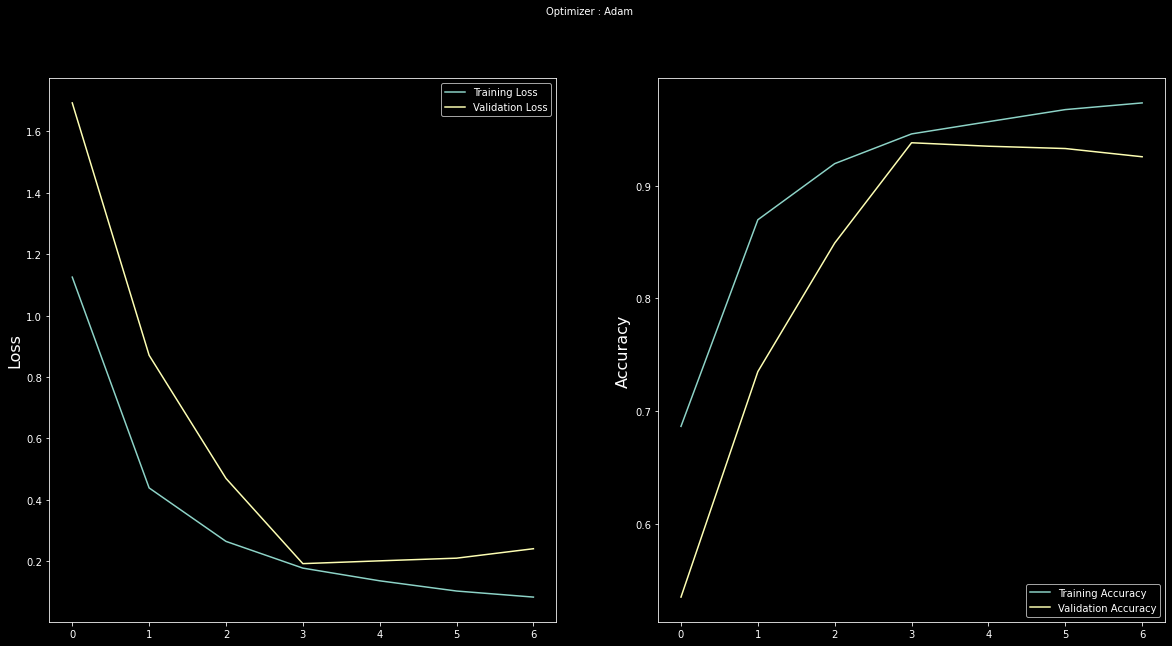

In [ ]:
#Plotting Accuracy & Loss
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Prediction

77.49143838882446% Confidence Potato___Early_blight


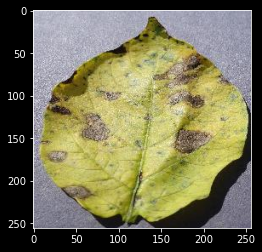

In [ ]:
img = Image.open(r'./test/test/PotatoEarlyBlight4.JPG')
x = np.array(img.resize((180,180)))
x = x.reshape(1,180,180,3)
res = model1.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + str(lab[classification]))
# print(label_encoder.inverse_transform([classification]))

# Saving the trained model

In [ ]:
model1.save('final_plantdisease_model')

INFO:tensorflow:Assets written to: final_plantdisease_model\assets


In [ ]:
model1.save('final_plantdisease_model.h5')

# Another Approach using keras sub classing

In [29]:


class Denselayer(layers.Layer):
    def _init_(self,units):
        super(Denselayer,self)._init_()
        self.units=units
    def build(self,input_shape):
        self.w= self.add_weight(shape=(input_shape,self.units),initializer="random_normal",training=True)
        self.b=self.add_weight(shape=(self.units,),initializer="random_normal",training=True)
    def call(self,input_tensor):
        return tf.matmul(input_tensor,self.w)+self.b


class CNNlayer(layers.Layer):
    def _init_(self,units,kernel_size=3):
        super(CNNlayer,self)._init_()
        self.cnn= tf.keras.layers.Conv2D(units,kernel_size,strides=1,padding="same")
        self.bn = tf.keras.layers.BatchNormalization()
        # self.rel = tf.keras.activations.relu()
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=1,padding="same")
        self.drop = tf.keras.layers.Dropout(0.25)
    def call(self,input_tensor,training=False):
        x = self.cnn(input_tensor)
        x = self.bn(x,training=training)
        x = tf.nn.relu(x)
        x = self.pool(x,training=training)
        x = self.drop(x,training=training)
        return x

class Batchcnn(layers.Layer):
    def _init_(self,inputs):
        super(Batchcnn,self)._init_()
        self.inputs=inputs
        self.cnn1 = CNNlayer(inputs[0],3)
        self.cnn2 = CNNlayer(inputs[1],3)
        self.cnn3 = CNNlayer(inputs[2],3)
        self.identity_matrix=CNNlayer(inputs[1])
    def call(self,input_tensor,training=False):
        x = self.cnn1(input_tensor,training=training)
        x = self.cnn2(x,training=training)
        x = self.cnn3(x+self.identity_matrix(input_tensor),training=training)
        return x

class FinalModel(keras.Model):
    def __init__(self,num_of_classes):
        super(FinalModel,self).__init__()
        self.layer1 = Batchcnn([64,64,128])
        self.layer2 = Batchcnn([128,256,512])
        self.flatten = tf.keras.layers.Flatten()
        self.layer3 = Denselayer(256)
        self.bn = tf.keras.layers.BatchNormalization()
        # self.relu = tf.keras.activations.relu()
        self.layer4 = Denselayer(512)
        self.drop = tf.keras.layers.Dropout(0.25)
        self.layer5 = Denselayer(num_of_classes)
    def call(self,input_tensor,training=False):
        x = self.layer1(input_tensor,training=training)
        x = self.layer2(x,training=training)
        x = self.flatten(x,training=training)
        x = self.layer3(x,training=training)
        x = self.bn(x,training=training)
        x = tf.nn.relu(x)
        x = self.drop(x,training=training)
        x = self.layer4(x,training=training)
        x = self.bn(x,training=training)
        x = tf.nn.relu(x)
        x = self.drop(x,training=training)
        x = self.layer5(x,training=training)
        return tf.nn.softmax(x)
    def model(self):
        x = keras.Input(shape=(180,180,3))
        return keras.Model(inputs=[x],outputs=self.call(x))

model5 = FinalModel(38)
print(model5.model().summary())

TypeError: Expected `trainable` argument to be a boolean, but got: [64, 64, 128]